In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import matplotlib.ticker as mtick

import glob

In [2]:
import world_bank_data as wb

pop = pd.DataFrame(wb.get_series('SP.POP.TOTL', mrv=1))
pop = pop.reset_index()

In [3]:
median_age = pd.read_csv('./WHS9_86,WHS9_88,WHS9_89,WHS9_92,WHS9_96,WHS9_97,WHS9_90.csv', \
                         index_col=[0])

In [4]:
median_age = median_age.iloc[1:,0]

In [5]:
median_age[median_age.index == 'United States']

Series([], Name: Population median age (years), dtype: float64)

In [6]:
df_c = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', \
                 parse_dates=True)

In [7]:
df_c = df_c[df_c['Province/State'] != 'Diamond Princess']
df_c = df_c[df_c['Province/State'] != 'Grand Princess']
df_c = df_c.groupby('Country/Region').sum()
df_c = df_c.T
df_c = df_c.drop('Lat')
df_c = df_c.drop('Long')
df_c = df_c.rename(columns={"US": "United States of America"}, errors="raise")
df_c = df_c.rename(columns={"Korea, South": "Republic of Korea"}, errors="raise")
df_c = df_c.rename(columns={"Iran": "Iran (Islamic Republic of)"}, errors="raise")
df_c = df_c.rename(columns={"United Kingdom": "United Kingdom of Great Britain and Northern Ireland"}, errors="raise")
df_c.columns
df_c.index = pd.to_datetime(df_c.index)
df_c.index.name = 'Date'

In [8]:
df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', \
                 parse_dates=True)

In [9]:
df = df[df['Province/State'] != 'Diamond Princess']
df = df[df['Province/State'] != 'Grand Princess']
df = df.groupby('Country/Region').sum()
df = df.T
df = df.drop('Lat')
df = df.drop('Long')
df = df.rename(columns={"US": "United States of America"}, errors="raise")
df = df.rename(columns={"Korea, South": "Republic of Korea"}, errors="raise")
df = df.rename(columns={"Iran": "Iran (Islamic Republic of)"}, errors="raise")
df = df.rename(columns={"United Kingdom": "United Kingdom of Great Britain and Northern Ireland"}, errors="raise")
df.columns
df.index = pd.to_datetime(df.index)
df.index.name = 'Date'

In [10]:
today = df.iloc[-1]

In [11]:
print(today[(today >= 10) & (today < 100)].index)
print(today[(today >= 100) & (today < 1000)].index)
print(today[(today >= 1000)].index)

Index(['Albania', 'Algeria', 'Argentina', 'Australia',
       'Bosnia and Herzegovina', 'Burkina Faso', 'Canada', 'Colombia',
       'Czechia', 'Denmark', 'Diamond Princess', 'Dominican Republic',
       'Ecuador', 'Egypt', 'Finland', 'Greece', 'Hungary', 'India', 'Iraq',
       'Ireland', 'Israel', 'Japan', 'Lebanon', 'Luxembourg', 'Malaysia',
       'Mexico', 'Morocco', 'Norway', 'Pakistan', 'Panama', 'Peru',
       'Philippines', 'Poland', 'Romania', 'San Marino', 'Serbia', 'Slovenia',
       'Ukraine'],
      dtype='object', name='Country/Region')
Index(['Austria', 'Belgium', 'Brazil', 'Germany', 'Indonesia',
       'Republic of Korea', 'Netherlands', 'Portugal', 'Sweden', 'Switzerland',
       'Turkey'],
      dtype='object', name='Country/Region')
Index(['China', 'France', 'Iran (Islamic Republic of)', 'Italy', 'Spain',
       'United States of America',
       'United Kingdom of Great Britain and Northern Ireland'],
      dtype='object', name='Country/Region')


In [12]:
condition = today[(today > 50)].index
print(list(condition))

['Austria', 'Belgium', 'Brazil', 'Canada', 'China', 'Denmark', 'Ecuador', 'France', 'Germany', 'Indonesia', 'Iran (Islamic Republic of)', 'Ireland', 'Italy', 'Japan', 'Republic of Korea', 'Netherlands', 'Philippines', 'Portugal', 'Romania', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United States of America', 'United Kingdom of Great Britain and Northern Ireland']


In [13]:
countries = list(condition)
# countries.remove('Iran')
# countries.remove('China')
# countries.append('Canada')

min_case_num = 1
min_case_pct = 1/100000.
title_name = "countries with >50 deaths"

In [14]:
data = {}
data_original = {}
data_pct = {}

for c in countries:
    data_original[c] = df[c]

    country = df[c]
    country100 = country[country >= min_case_num]
    country100 = country100.reset_index()
    data[c] = country100[c]
    
#     size = pop[pop['Country'] == c]['SP.POP.TOTL']
#     df[c+' (by population)'] = df[c] * 1. / int(size)

#     country_pct = df[c+' (by population)']
#     country0_00001 = country_pct[country_pct >= min_case_pct]
#     country0_00001 = country0_00001.reset_index()
#     data_pct[c] = country0_00001[c+' (by population)']

In [15]:
scatter = {}

for c in countries:
    m_age = median_age[median_age.index == c]
    m_age = m_age[0]
    num_death = df[c][-1]
    num_confirmed = df_c[c][-1]
    death_rate = num_death/num_confirmed * 100.

#     print(c)
#     print(m_age)
#     print(num_death)
#     print(num_confirmed)
#     print(death_rate)
#     print('---')
    
    scatter[c] = [m_age, death_rate, num_death, num_confirmed]
    
# print(scatter)
df_death = pd.DataFrame(data=scatter).T
df_death = df_death.reset_index()
df_death = df_death.rename(columns={'index': "country", 0: "median age", 1: "death rate", 2: "deaths", 3: "confirmed"})

In [16]:
df_death

,country,median age,death rate,deaths,confirmed
0,Austria,42.7,1.122895,108.0,9618.0
1,Belgium,41.6,4.311287,513.0,11899.0
2,Brazil,30.3,3.472374,159.0,4579.0
3,Canada,40.1,1.069736,79.0,7385.0
4,China,37.4,4.024429,3308.0,82198.0
5,Denmark,41.1,2.794918,77.0,2755.0
6,Ecuador,26.1,3.058104,60.0,1962.0
7,France,40.6,6.707992,3030.0,45170.0
8,Germany,45.5,0.964342,645.0,66885.0
9,Indonesia,27.8,8.628006,122.0,1414.0


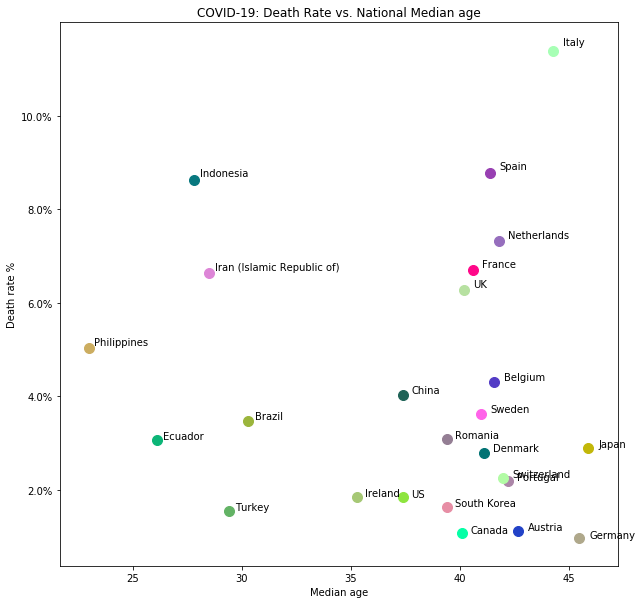

In [17]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

# import matplotlib.cm as cm
import matplotlib.colors as colors

# df_death.plot.scatter(x='median age',
#                       y='death rate',
#                       label='country',
#                       ax=axes)

# x = df_death['median age']
# y = df_death['death rate']
# l = df_death['country']

# colormap = cm.viridis
# colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(df_death['country']))]
colorlist = list(colors.ColorConverter.colors.keys())

for i,c in enumerate(list(df_death['country'])):
    x = df_death['median age'][i]
    y = df_death['death rate'][i]
    l = df_death['country'][i]

    axes.scatter(x, y, label=l, s=100, c=colorlist[(i+21) % len(colorlist)])
    
    if l == 'United States of America':
        axes.annotate('US', (x*1.01, y*1.01))
    elif l == 'Republic of Korea':
        axes.annotate('South Korea', (x*1.01, y*1.01))
    elif l == 'United Kingdom of Great Britain and Northern Ireland':
        axes.annotate('UK', (x*1.01, y*1.01))
    else:
        axes.annotate(l, (x*1.01, y*1.01))

# axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
title = "COVID-19: Death Rate vs. National Median age"
axes.set_title(title)
axes.set_xlabel("Median age")
axes.set_ylabel("Death rate %")
fig.savefig('images/'+title+'.jpg', dpi=300, bbox_inches = "tight")

Text(0.5, 0, 'Days after passing 1 death')

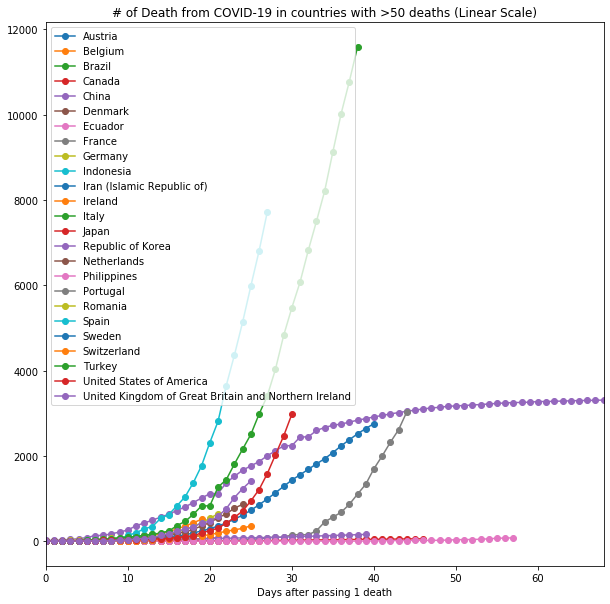

In [18]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    data[c].plot(marker='o')

axes.legend()
axes.set_title("# of Death from COVID-19 in " + title_name + " (Linear Scale)")
axes.set_xlabel("Days after passing " + str(min_case_num) + " death")

Text(0.5, 0, 'Days after passing 1 death')

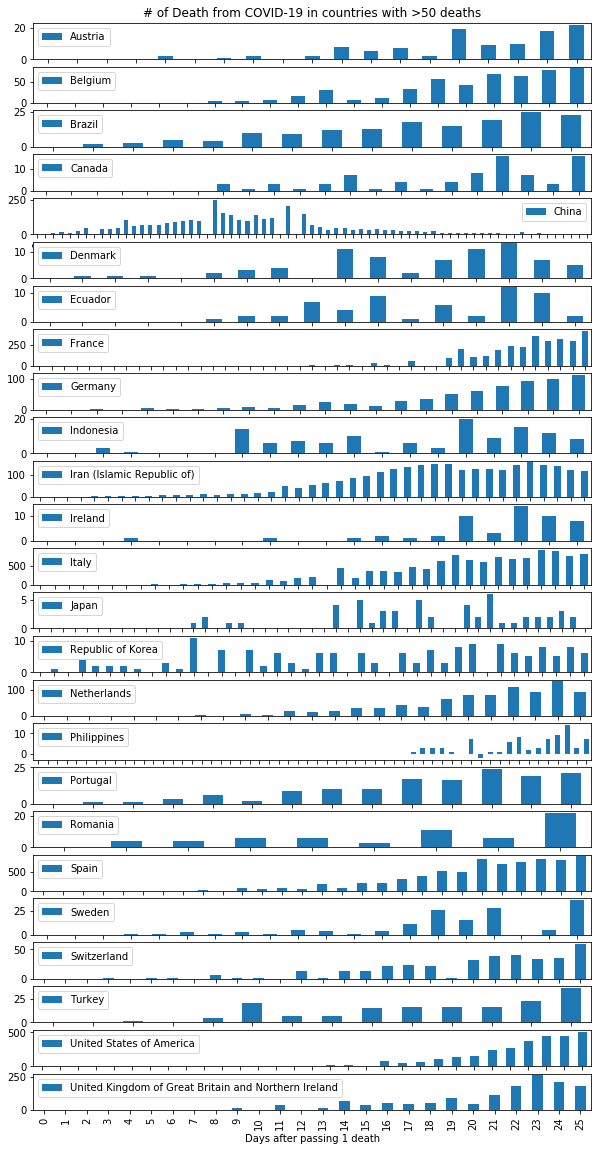

In [19]:
fig, axes = plt.subplots(len(data.keys()), figsize=(10, 20))

i = 0
for c in data.keys():
    data[c].diff().plot(ax=axes[i], kind="bar")
    axes[i].legend()
    i += 1

axes[0].set_title("# of Death from COVID-19 in " + title_name)
axes[-1].set_xlabel("Days after passing " + str(min_case_num) + " death")